In [3]:
import tensorflow
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D, Flatten, MaxPooling2D, Dense
import numpy as np
from keras.optimizers import SGD

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
import matplotlib.pyplot as plt

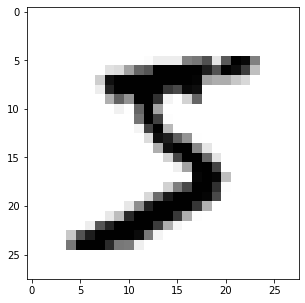

In [8]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0], cmap='binary')

In [9]:
y_train[0]

5

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [11]:
from keras.utils import to_categorical

In [12]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

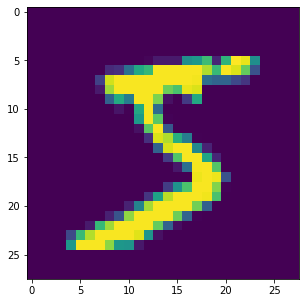

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train_norm[0])

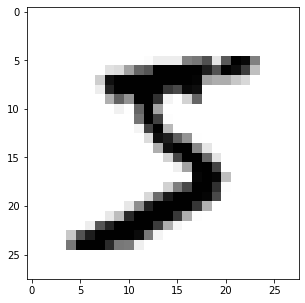

In [14]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train_norm[0], cmap='binary')

In [15]:
input_shape = (28, 28, 1)

In [16]:
# constructing the layers...
input_layer = Input(shape=input_shape)
layer1 = Conv2D(32, kernel_size = (3,3), activation='relu')(input_layer)
layer2 = MaxPooling2D(pool_size=(3,3))(layer1)
layer3 = Flatten()(layer2)
layer4 = Dense(250, activation='relu')(layer3)
layer5 = Dense(10, activation='softmax')(layer4)

In [17]:
Model??

In [18]:
input_layer

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>

In [20]:
model = Model(input_layer, layer5)

In [21]:
model.compile??

In [25]:
from keras.losses import categorical_crossentropy

In [26]:
model.compile(optimizer=SGD(learning_rate=0.1), 
             loss = categorical_crossentropy, 
             metrics = ['accuracy'])

In [27]:
History = model.fit(x_train_norm, y_train_encoded, verbose='auto', epochs = 10, validation_data=(x_test_norm, y_test_encoded))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2249 - accuracy: 0.9304 - val_loss: 0.0661 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0680 - accuracy: 0.9793 - val_loss: 0.0472 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0352 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0361 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0345 -

In [28]:
model.evaluate??

In [29]:
score = model.evaluate(x_test_norm, y_test_encoded, verbose='auto')

313/313 [==============================] - 2s 5ms/step - loss: 0.0328 - accuracy: 0.9895


In [30]:
score

[0.03276047483086586, 0.9894999861717224]

In [31]:
print('Accuracy:', score[1])
print('Loss is:', score[0])

Accuracy: 0.9894999861717224
Loss is: 0.03276047483086586


In [32]:
predictions = model.predict(x_test_norm)

313/313 [==============================] - 5s 5ms/step


In [33]:
predictions

array([[8.2565628e-11, 9.7957942e-10, 3.8276212e-08, ..., 9.9998915e-01,
        5.1331193e-09, 6.2674971e-08],
       [6.4365575e-11, 8.0339629e-10, 1.0000000e+00, ..., 2.4457584e-16,
        3.9779074e-12, 2.0121187e-15],
       [1.2654095e-06, 9.9996996e-01, 2.5249474e-06, ..., 2.3303948e-05,
        2.6603084e-07, 2.5942237e-08],
       ...,
       [5.1151044e-16, 2.3920484e-12, 2.3923104e-14, ..., 8.7493407e-10,
        1.2544708e-10, 5.9021515e-10],
       [3.1921417e-09, 1.0710348e-11, 3.6451371e-09, ..., 3.3506424e-09,
        1.4239778e-02, 3.0444108e-10],
       [3.3964729e-09, 2.0418531e-11, 9.4374277e-09, ..., 1.5977995e-16,
        5.2370414e-10, 9.5754448e-13]], dtype=float32)

In [34]:
predictions.shape

(10000, 10)

In [35]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
plt.subplot??

In [37]:
plt.xticks??

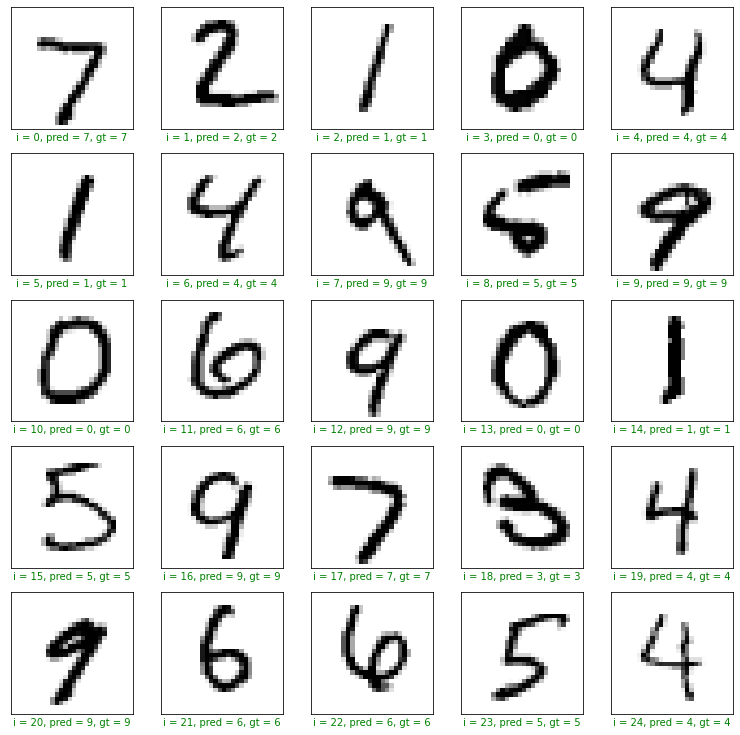

In [38]:
plt.figure(figsize=(13,13))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.xticks([])
    plt.yticks([])
    
    pred= np.argmax(predictions[start_index + i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color=col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

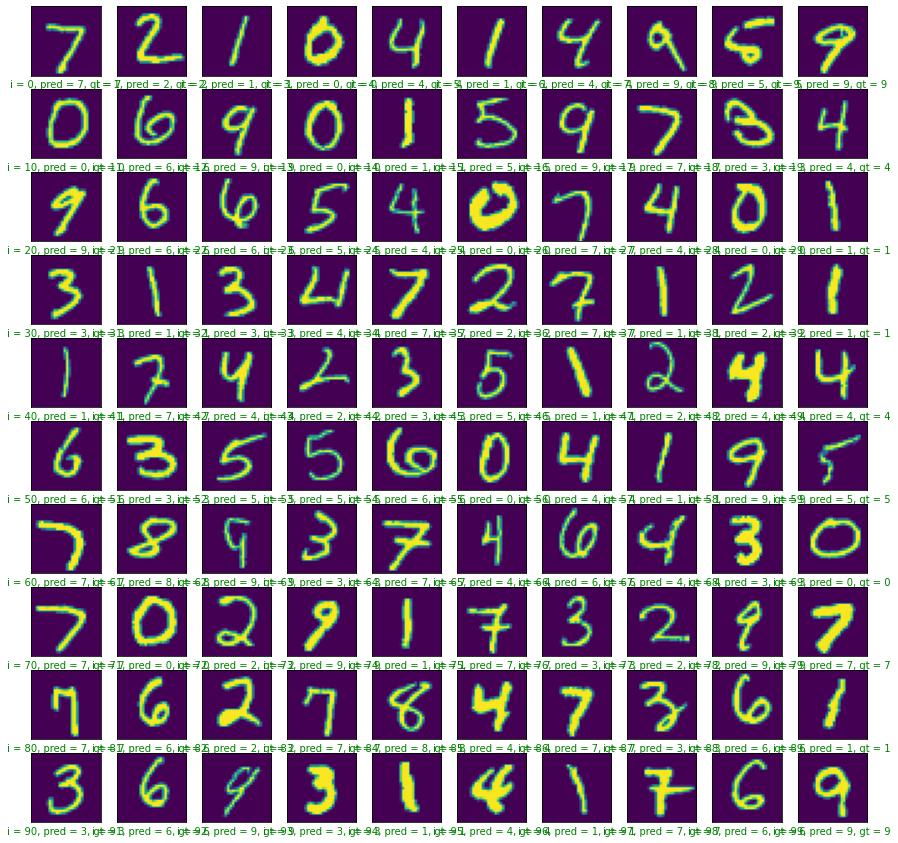

In [39]:
plt.figure(figsize=(15,15))
start_index = 0
for i in range(100):
    plt.subplot(10, 10, 1+i)
    plt.xticks([])
    plt.yticks([])
    
    pred= np.argmax(predictions[start_index + i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color=col)
    plt.imshow(x_test[start_index + i]) # cmap='binary')
plt.show()

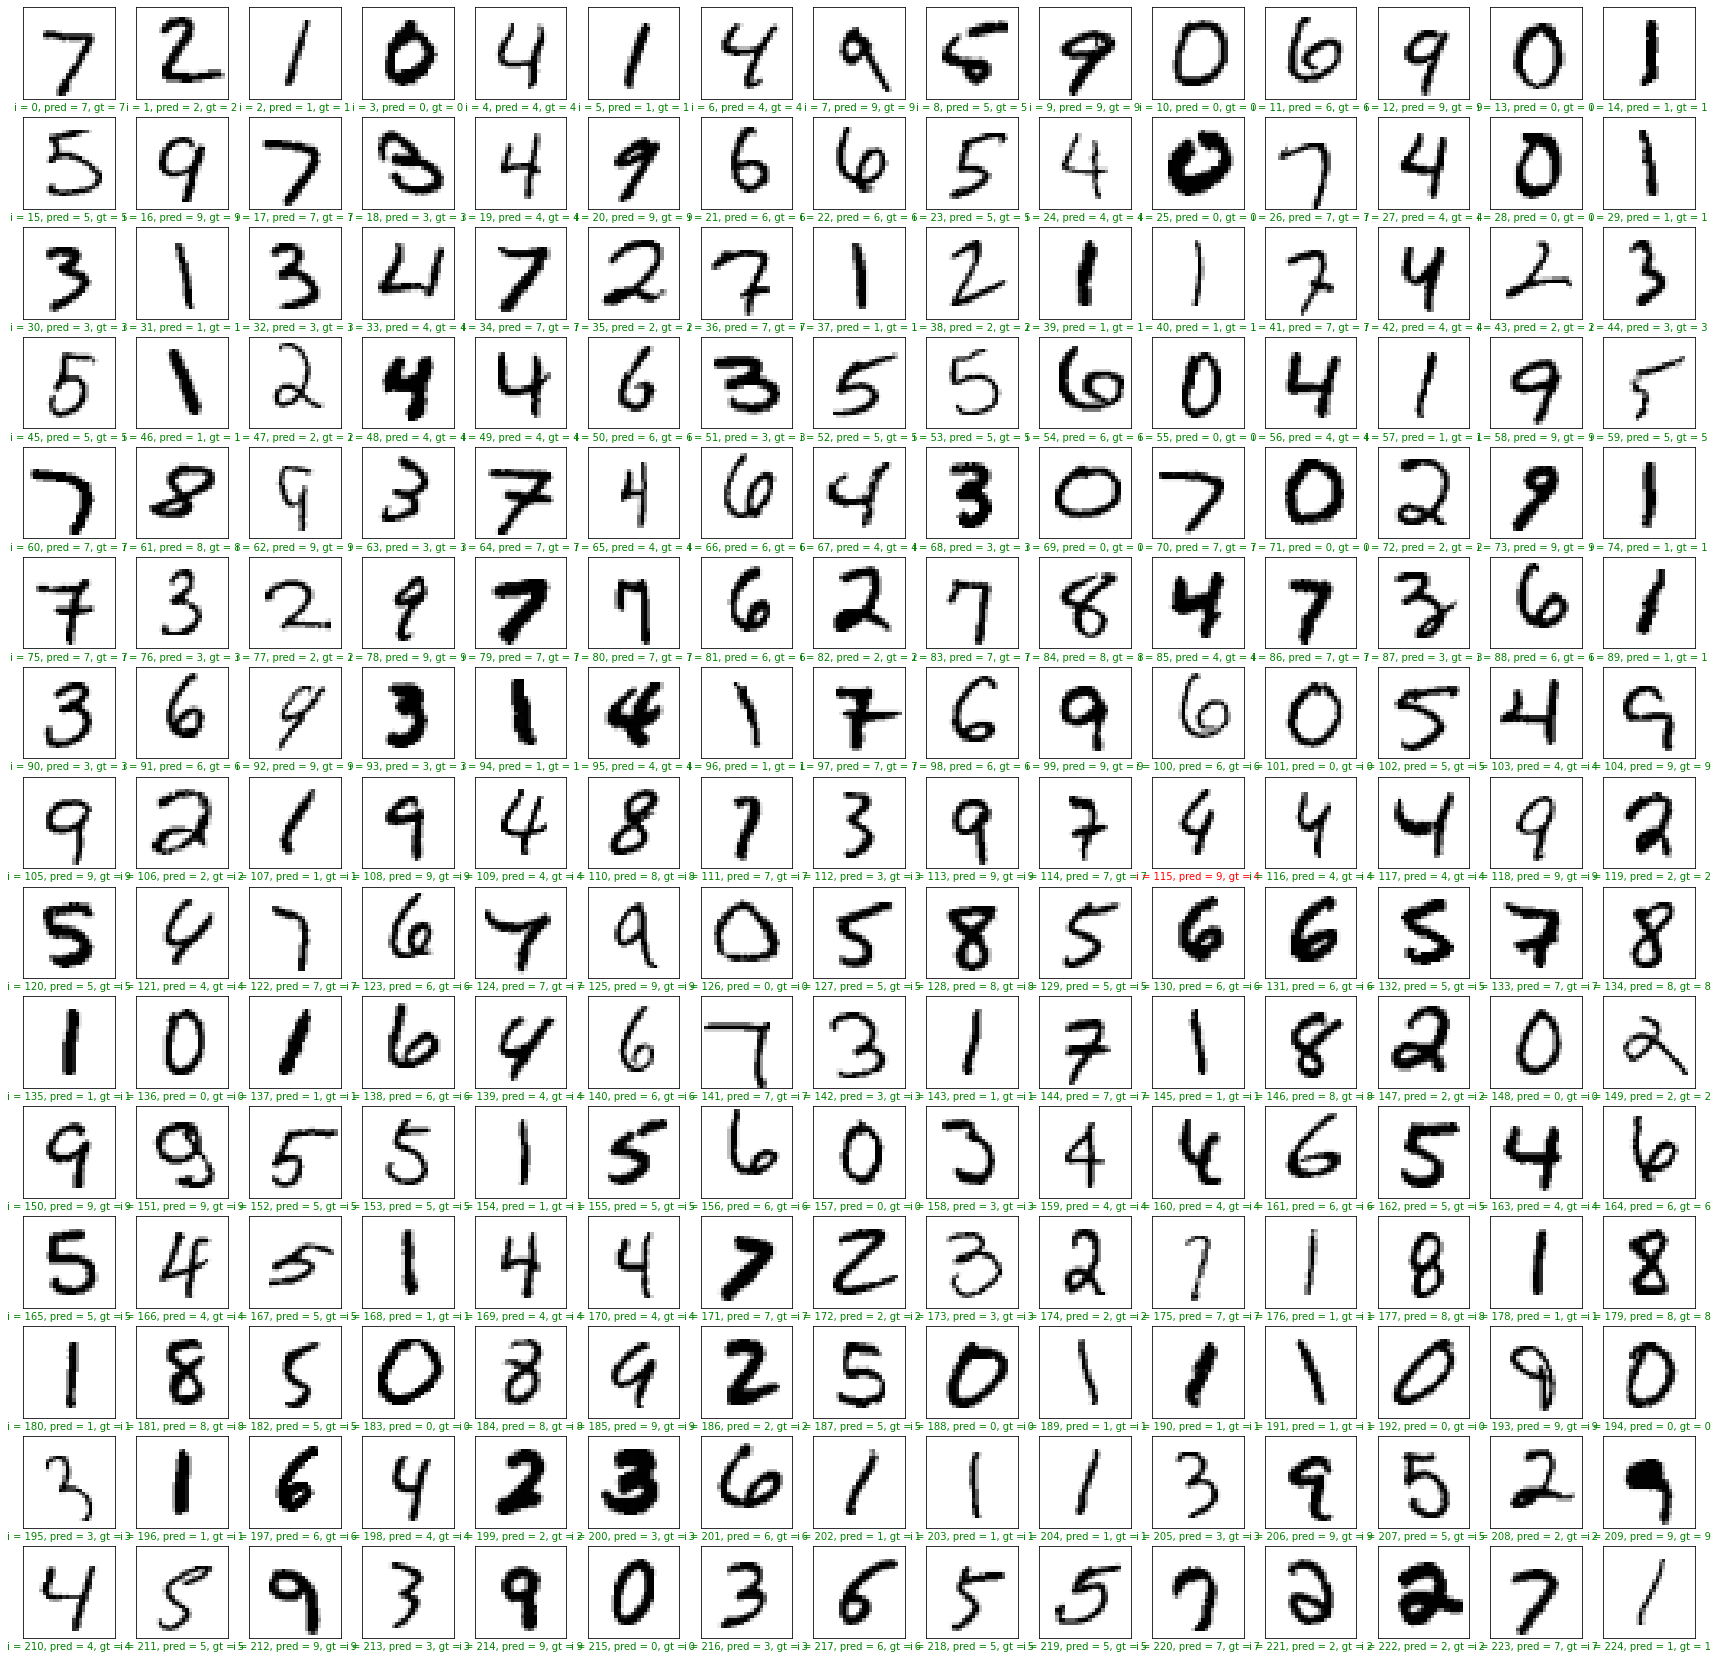

In [49]:
plt.figure(figsize=(30,30))
start_index = 0
for i in range(225):
    plt.subplot(15, 15, 1+i)
    plt.xticks([])
    plt.yticks([])
    
    pred= np.argmax(predictions[start_index + i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color=col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

In [47]:
epochs = list(range(1, 11))
traning_accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

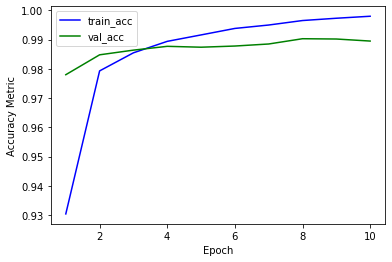

In [51]:
plt.plot(epochs, traning_accuracy, 'b', label='train_acc')
plt.plot(epochs, validation_accuracy, 'g', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Metric')
plt.legend()
plt.show()

In [52]:
training_loss = History.history['loss']
validation_loss = History.history['val_loss']

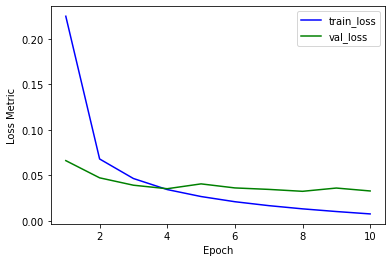

In [54]:
plt.plot(epochs, training_loss, 'b', label='train_loss')
plt.plot(epochs, validation_loss, 'g', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Metric')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix??

In [57]:
np.argmax??

In [59]:
Confusion_Matrix = confusion_matrix(y_true= y_test, y_pred= np.argmax(predictions, axis=1))

In [60]:
Confusion_Matrix

array([[ 974,    0,    1,    0,    0,    0,    2,    1,    1,    1],
       [   0, 1130,    2,    2,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1024,    1,    1,    0,    0,    3,    1,    0],
       [   0,    0,    2, 1007,    0,    1,    0,    0,    0,    0],
       [   0,    0,    1,    0,  973,    0,    1,    0,    0,    7],
       [   1,    0,    0,   10,    0,  877,    2,    0,    1,    1],
       [   5,    2,    1,    0,    2,    1,  945,    0,    2,    0],
       [   0,    1,    5,    1,    0,    0,    0, 1019,    1,    1],
       [   6,    0,    2,    1,    0,    1,    0,    4,  957,    3],
       [   1,    2,    0,    3,    6,    1,    0,    4,    3,  989]],
      dtype=int64)

In [61]:
Confusion_Matrix.shape

(10, 10)

In [62]:
from sklearn.metrics import classification_report

In [63]:
classification_report(y_true= y_test, y_pred= np.argmax(predictions, axis=1))

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       980\n           1       0.99      1.00      1.00      1135\n           2       0.99      0.99      0.99      1032\n           3       0.98      1.00      0.99      1010\n           4       0.99      0.99      0.99       982\n           5       1.00      0.98      0.99       892\n           6       0.99      0.99      0.99       958\n           7       0.99      0.99      0.99      1028\n           8       0.99      0.98      0.99       974\n           9       0.99      0.98      0.98      1009\n\n    accuracy                           0.99     10000\n   macro avg       0.99      0.99      0.99     10000\nweighted avg       0.99      0.99      0.99     10000\n'

In [64]:
classification_report??

In [65]:
type(classification_report)

function